# Hist

## General

[Nino-hist](https://nino-hist.site) provides a customized histogram object named `Hist` for [boost-histogram](https://boost-histogram.readthedocs.io/en/latest). The new feature of `Hist` is drawing pull plot, in which barring ranges, calculate arithmetic mean, fitting observations are conducted. Let's see how it works in [Nino-hist](https://nino-hist.site) `Hist`.

Initialize a `Hist` instance like this and fill. We are going to see some new features of `Hist`.

In [1]:
import hist
import numpy as np
import matplotlib.pyplot as plt

h = hist.Hist(
    hist.axis.Regular(50, -4, 4, name="S", title="s [units]", underflow=False, overflow=False)
)

data = np.random.normal(size=1_000)

h.fill(data)

Hist(Regular(50, -4, 4, underflow=False, overflow=False, metadata={'name': 'S', 'title': 's [units]'}), storage=Double()) # Sum: 1000.0

## Pull plot

Pull plot only accept a callable parameter. If you put another types in it, it will raise a type error. Then let's see what happens if we use bool type as input.

In [2]:
nino = True
ax1, ax2 = h.pull_plot(nino)     # "Only callable parameter is accepted in pull plot."

TypeError: Callable parameter func is supported in pull plot.

**Opps... As expected, this function was not called successfully.** To get back to the point, we use the callable object as a parameter. 

Define the function (the assumed distribution of observations) you are going to use pull plot to compare.

In [3]:
def pdf(x, a=1/np.sqrt(2*np.pi), x0=0, sigma=1, offset=0):
    return a * np.exp(-(x-x0)**2/(2*sigma**2)) + offset

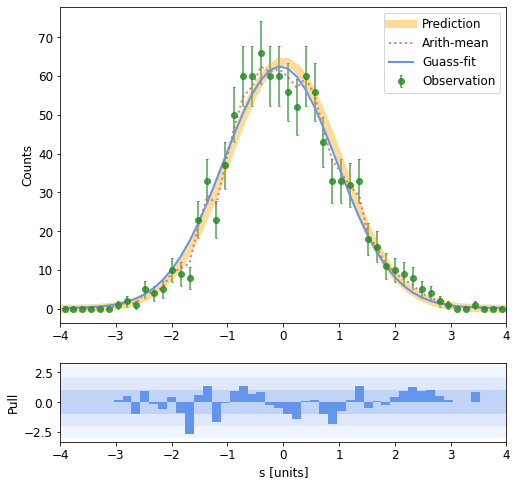

In [4]:
fig, ax, pull_ax = h.pull_plot(pdf, size='m', theme='Chrome')

It works! You can see the pull plot above and it returns the figure and axis objects of this plot like this. So you can save or load it anywhere (using pickle if needed). 

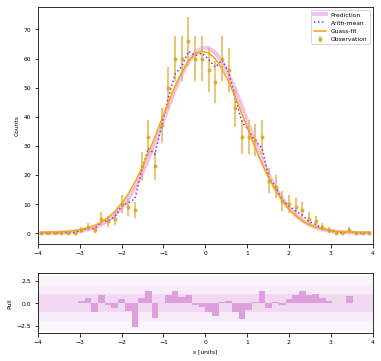

In [5]:
fig = plt.figure(figsize=(6, 6))
fig, _, _ = h.pull_plot(pdf, size="s", fig=fig, theme='spring')
fig.savefig("img/fig-img.png")

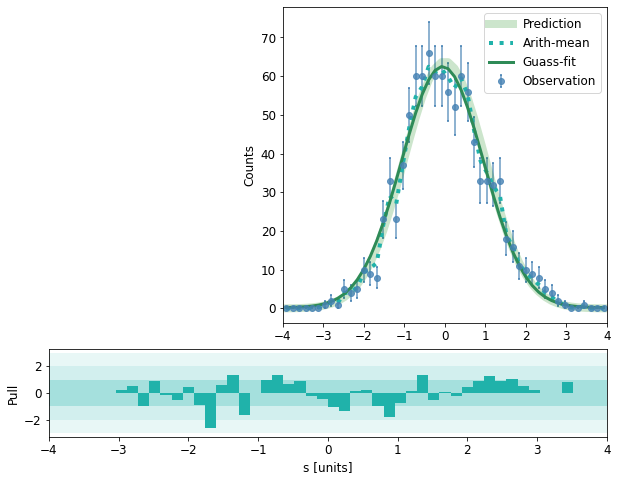

In [6]:
fig = plt.figure(figsize=(10, 10))
grid = fig.add_gridspec(5, 5, wspace=0.3, hspace=0.3)
ax = fig.add_subplot(grid[0:3, 2:])
pull_ax = fig.add_subplot(grid[3:4, :], sharex=ax)

h.pull_plot(pdf, size="m", fig=fig, ax=ax, pull_ax=pull_ax, theme='winter')
fig.savefig("img/ax-img.png")

[Nino-hist](https://nino-hist.site) is a user-friendly tool, which mean that you can easily use it even you are not a professionally know Python. For this propose, `Themes` are provided for users. The possible options for `theme` parameter include: 'chrome', 'dark', 'light', 'spring', 'summer', 'autumn', 'winter', 'cool', 'hot'. We are going to enrich these themes in future. If you expect to use pull plot more professionally, you can view the pull plot pro in the next part for help.

If convenience is the main focus, you can create a pull plot with only a `callable func` parameter, as the `size` and `theme` parameters have default setting, i.e., 'large' and 'chrome'. For `size`, you will have 'huge', 'large', 'medium', 'small', 'tiny' options. No requirements on lower or upper, and even the first letters are acceptable.

Note that if you are using you own figure rather than using the figure created by default, the `size` represents the plot size instead of figure size. So inputting a huge figure while using `size='small'` will result in large blank in your returned figure. You are supposed to choose a `size` near your figure size or adjust figure size aforehand.

Iterate through all the theme options to produce beautiful images!

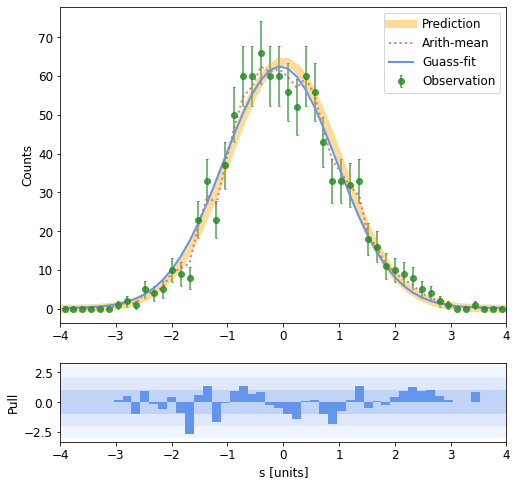

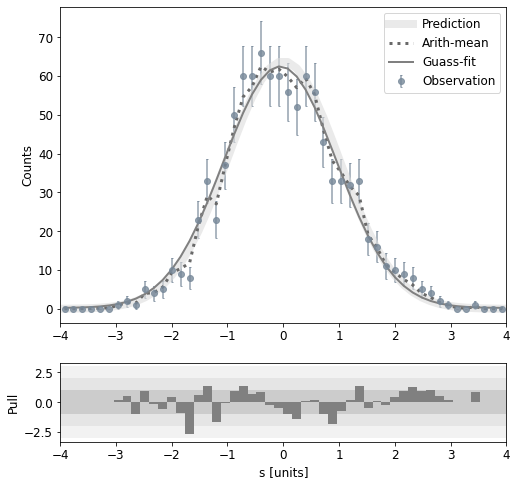

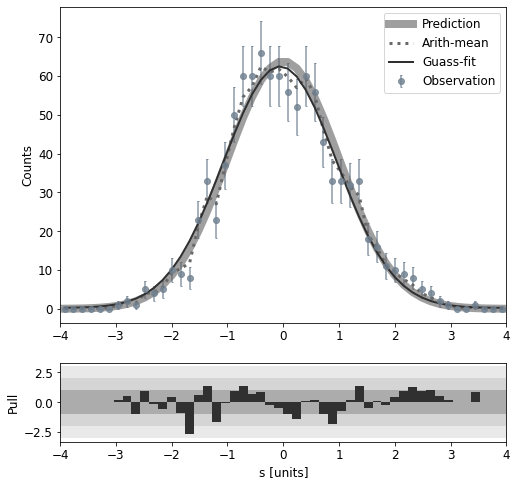

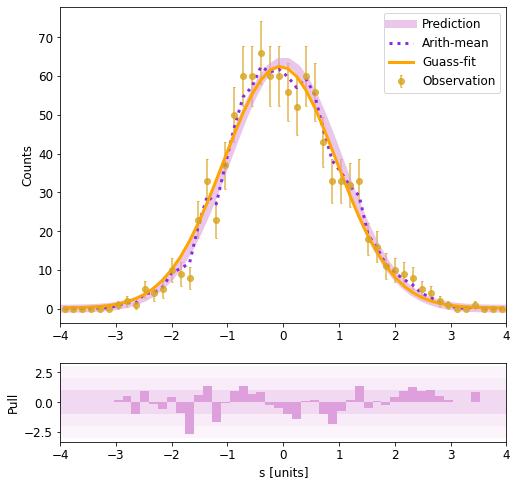

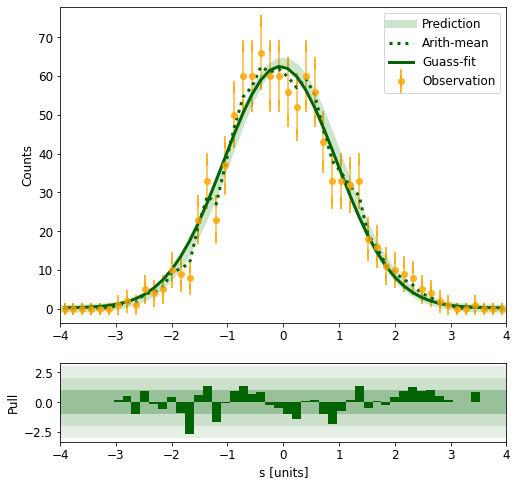

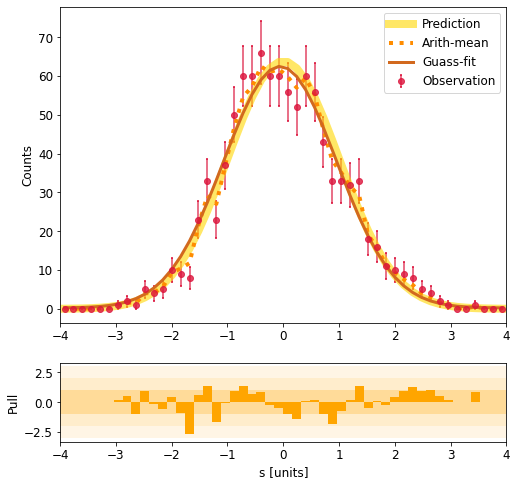

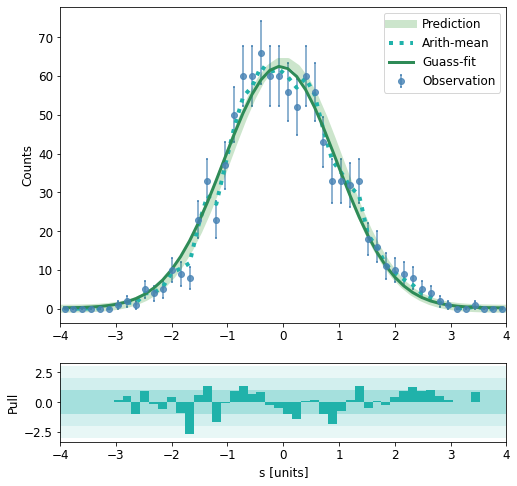

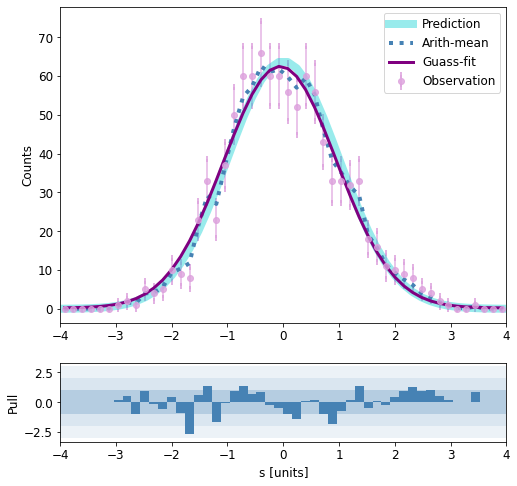

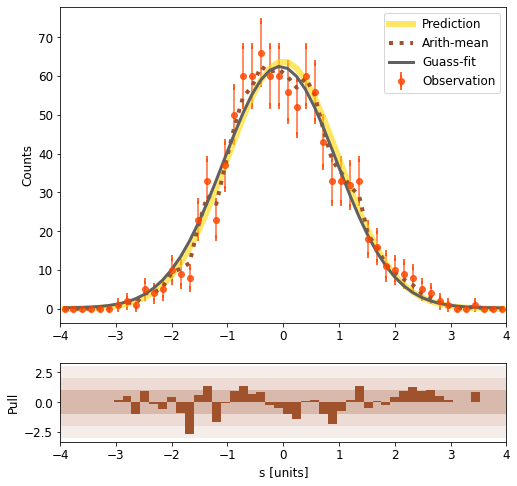

In [7]:
themes=['Chrome', 'Light', 'Dark', 'Spring',\
        'Summer', 'Autumn', 'Winter', 'Cool', 'Hot']

for t in themes:
    h.pull_plot(pdf, size="m", theme=t)
    plt.savefig(f"./img/{t}.png")

## Pull plot pro

We also provide a more customized pull plot method -- pull plot pro. Pull plot pro has offer more choices for users, such as setting color, alpha, markersize... Let's see what's new!

In [8]:
import hist
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def pdf(x, a=1/np.sqrt(2*np.pi), x0=0, sigma=1, offset=0):
    return a * np.exp(-(x-x0)**2/(2*sigma**2)) + offset

(<Figure size 576x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12a940190>)

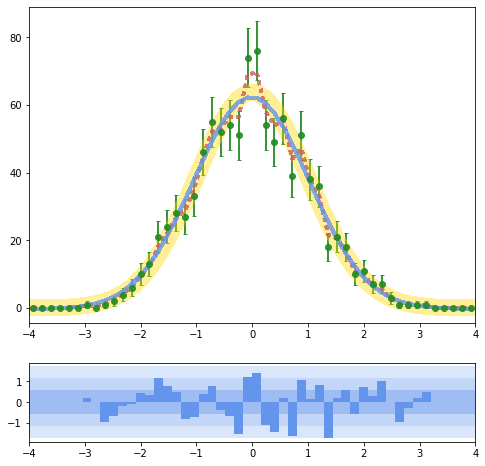

In [10]:
h = hist.Hist(
    hist.axis.Regular(50, -4, 4, name="S", title="s [units]", underflow=False, overflow=False)
)

data = np.random.normal(size=1_000)
h.fill(data)

h.pull_plot_pro(pdf)

The feature of auto-construting figure and axes is still support, with 8\*8 figure size. Themes are no longer supported, but if you do not specify the params, the plotting will be like the 'Chrome' style. 

We specify some params for pull plot pro. Just like normal plotting params in Matplotlib, what you need to do is just to add axis names' abbrevations to normal Matplotlib params keywords:

- errorbar param -> `eb_param`
- valueplot param -> `vp_param`
- meanplot param -> `mp_param`
- fitplot param -> `fp_param`
- barplot param -> `bar_param`
- patchplot param -> `pp_param`

*Note that we does not implement all kwargs thoroughly, but it's not hard. It's just a matter of time. And if you want to contribute to this, follow the rules in [Development](https://nino-hist.site/en/latest/development/index.html) and make your PR!*

Let's see a more complicated example. In this example, we change the style of pull plot pro to the one like 'Autumn' and set a beautiful gradient effect to the patch plot.

(<Figure size 576x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12ab96ad0>)

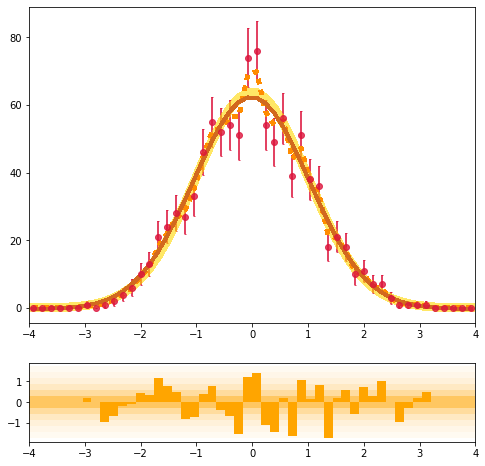

In [11]:
h.pull_plot_pro(pdf, eb_ecolor='crimson', eb_mfc='crimson', eb_mec='crimson', eb_fmt='o', eb_ms=6,\
                eb_capsize=1, eb_capthick=2, eb_alpha=.8, vp_c='gold', vp_ls='-', vp_lw=8,\
                vp_alpha=.6, mp_c='darkorange', mp_ls=':', mp_lw=4, mp_alpha=1.,\
                fp_c='chocolate', fp_ls='-', fp_lw=3, fp_alpha=1., bar_fc='orange',\
                pp_num=6, pp_fc='orange', pp_alpha=.618, pp_ec=None)

We recommend you to manipulate axes outside pull plot pro like this.

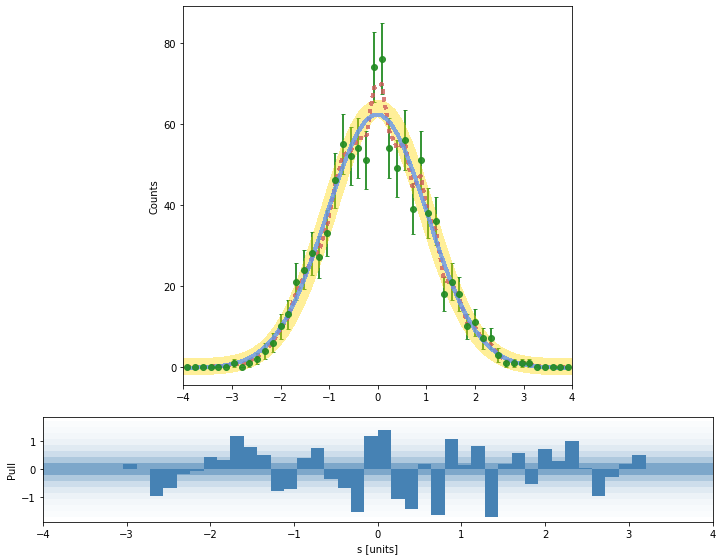

In [12]:
fig = plt.figure(figsize=(12, 12))
grid = fig.add_gridspec(5, 5, wspace=0.3, hspace=0.3)
ax = fig.add_subplot(grid[0:3, 1:4])
pull_ax = fig.add_subplot(grid[3:4, :], sharex=ax)

fig, ax, pull_ax = h.pull_plot_pro(pdf, fig=fig, ax=ax, pull_ax=pull_ax, bar_fc='steelblue',\
                pp_fc='steelblue', pp_num=8, pp_alpha=.7)

ax.set_ylabel("Counts")
pull_ax.set_xlabel(h.axes[0].title)
pull_ax.set_ylabel("Pull")

fig.savefig("img/ax-img-pro.png")

Pull plot provides themes for users, which make it a convenient tool to draw pull plot. 

Pull plot pro realizes all possibilities, and you can use it for more specified usage. Do some experiments to explore it by yourself!